In [1]:
import os
import pdfplumber
import pandas as pd
import re
from bs4 import BeautifulSoup
import os
import pdfplumber
import pandas as pd
import re

## Download EDGAR docs

In [ ]:
from sec_edgar_downloader import Downloader

dl = Downloader('EDGARfiles')

# ciks = ['0000910631', '0001577639', '0000100122', '0001370946']


dl.get("10-Q", "ARCC", after="2004-01-01", before="2010-12-31")


In [ ]:
dl.get("10-Q", "ARCC", after="2011-01-01", before="2021-07-31")


In [ ]:
dl.get("10-K", "ARCC", after="2004-01-01", before="2010-12-31")

In [ ]:
dl.get("10-K", "ARCC", after="2011-01-01", before="2016-12-31")

In [ ]:
dl.get("10-K", "ARCC", after="2017-01-01", before="2021-07-31")

In [4]:
tickers = ['ARCC', 'FSK', 'ORCC', 'HTGC', 'MAIN', 'TSLX', 'GBDC', 'PSEC', 'GSBD', 'NMFC',
          'OCSL', 'AINV', 'TCPC', 'NEWT', 'BCSF', 'CGBD', 'SLRC', 'BBDC', 'CSWC', 'GAIN',
          'PFLT', 'TPVG', 'PNNT', 'FDUS', 'GLAD']

In [2]:
import glob

In [23]:
file_list = []
for ticker in tickers:
    for name in glob.glob('BDC_edgar/sec-edgar-filings/{}/10-*/*/filing-details.html'.format(ticker)):
        file_list.append(name)

In [24]:
file_list

['BDC_edgar/sec-edgar-filings/ARCC/10-Q/0001104659-05-055036/filing-details.html',
 'BDC_edgar/sec-edgar-filings/ARCC/10-Q/0001104659-08-050548/filing-details.html',
 'BDC_edgar/sec-edgar-filings/ARCC/10-Q/0001104659-09-047554/filing-details.html',
 'BDC_edgar/sec-edgar-filings/ARCC/10-Q/0001104659-12-073940/filing-details.html',
 'BDC_edgar/sec-edgar-filings/ARCC/10-Q/0001104659-07-080878/filing-details.html',
 'BDC_edgar/sec-edgar-filings/ARCC/10-Q/0001104659-15-055586/filing-details.html',
 'BDC_edgar/sec-edgar-filings/ARCC/10-Q/0001104659-13-037917/filing-details.html',
 'BDC_edgar/sec-edgar-filings/ARCC/10-Q/0001104659-16-136353/filing-details.html',
 'BDC_edgar/sec-edgar-filings/ARCC/10-Q/0001287750-21-000063/filing-details.html',
 'BDC_edgar/sec-edgar-filings/ARCC/10-Q/0001104659-07-037848/filing-details.html',
 'BDC_edgar/sec-edgar-filings/ARCC/10-Q/0001104659-11-043387/filing-details.html',
 'BDC_edgar/sec-edgar-filings/ARCC/10-Q/0001104659-06-052686/filing-details.html',
 'BD

In [25]:
len(file_list)

582

In [29]:
path = os.path.join(file_list)

SyntaxError: invalid syntax (<ipython-input-29-8886be1b3f2c>, line 1)

In [30]:
path = os.path.join(rootdir, filelist[0])

In [31]:
path

'ARCCdoc/13_4Q.html'

In [26]:
rootdir = 'ARCCdoc'

filelist = os.listdir(rootdir)

In [27]:
filelist

['13_4Q.html',
 '18_3Q.html',
 '08_3Q.html',
 '11_1Q.html',
 '11_3Q.html',
 '18_1Q.html',
 '08_1Q.html',
 '13_2Q.html',
 '10_3Q.html',
 '.DS_Store',
 '09_1Q.html',
 '19_1Q.html',
 '12_4Q.html',
 '09_3Q.html',
 '19_3Q.html',
 '10_1Q.html',
 '12_3Q.html',
 '09_4Q.html',
 '11_2Q.html',
 '19_4Q.html',
 '18_2Q.html',
 '10_4Q.html',
 '08_2Q.html',
 '12_1Q.html',
 '09_2Q.html',
 '11_4Q.html',
 '19_2Q.html',
 '13_1Q.html',
 '13_3Q.html',
 '18_4Q.html',
 '10_2Q.html',
 '08_4Q.html',
 '20_1Q.html',
 '05_2Q.html',
 '15_2Q.html',
 '06_3Q.html',
 '16_3Q.html',
 '20_3Q.html',
 '06_1Q.html',
 '16_1Q.html',
 '14_4Q.html',
 '04_4Q.html',
 '17_1Q.html',
 '07_1Q.html',
 '05_4Q.html',
 '15_4Q.html',
 '14_2Q.html',
 '17_3Q.html',
 '07_3Q.html',
 '21_1Q.html',
 '05_1Q.html',
 '15_1Q.html',
 '20_2Q.html',
 '17_4Q.html',
 '07_4Q.html',
 '05_3Q.html',
 '15_3Q.html',
 '06_2Q.html',
 '16_2Q.html',
 '20_4Q.html',
 '14_3Q.html',
 '04_3Q.html',
 '17_2Q.html',
 '07_2Q.html',
 '21_2Q.html',
 '14_1Q.html',
 '06_4Q.htm

In [ ]:
#list element merge    
def concat_text(ls):
    a=''
    for i in ls:
        a = a + str(i)
    return a
#Get pdf text
def get_pdf_text(rootdir,ls): 
    ls_text = []
    for file in range(len(ls)):
        ls_txt = []
        path = os.path.join(rootdir, ls[file])
        with pdfplumber.open(path) as pdf:
            for i in range(len(pdf.pages)):
                #print(i)
                page = pdf.pages[i]   
                text = page.extract_text()
                ls_txt.append(text)
            concat = concat_text(ls_txt)
            ls_text.append(concat)
    return ls_text

In [33]:
def cleaning(text):
    # text = ''.join(map(str, ls_text))
    elements = text.split('\n')
    
    lines = []
    for sent in elements:
        sent = sent.replace('\xa0', ' ')
        lines.append(sent)

    while('' in lines):
        lines.remove('')
    while(' ' in lines):
        lines.remove(' ')
    while('  ' in lines):
        lines.remove('  ')
    while('   ' in lines):
        lines.remove('   ')
        
    finaltext = ' '.join(lines)
    
    return finaltext

In [41]:
def loadHTM(filelist):
    ls_text = []
    for i in range(len(filelist)):
        with open(filelist[i]) as fp:
            soup = BeautifulSoup(fp)
            text = soup.get_text()
        cleaned_text = cleaning(text)
        ls_text.append(cleaned_text) 
    return ls_text

In [20]:
def loadHTM(rootdir, filelist):
    ls_text = []
    for file in range(len(filelist)):
        path = os.path.join(rootdir, filelist[file])
        with open(path, 'rb') as fp:
            soup = BeautifulSoup(fp)
            text = soup.get_text()
        # ls_text.append(text)
        cleaned_text = cleaning(text)
        ls_text.append(cleaned_text)   
    return ls_text

In [34]:
def convert_df(ls1,ls2):
    df = pd.DataFrame(columns=['file name', 'document content'])
    for i in range(len(ls1)):
        df = df.append(pd.DataFrame({"file name":ls2[i],"document content":ls1[i]}, index = [0]), ignore_index = True)
    return df

In [35]:
def read_keyword(filepath):
    df1 = pd.read_excel(filepath)
    return df1

In [36]:
def extract_file(df1,df2):
    df3 = pd.DataFrame(columns=['file name', 'Key words', 'Related statements in the file'])
    for i in range(df1.shape[0]):
        #print(i)
        for word in df2['keyword']:
            #print(word)
            # result = re.findall('({}.*?)\.'.format(word), df1['document content'][i], re.S)
            result = re.findall(r"([^.]*?{}[^.]*\.)".format(word), df1['document content'][i])
            for j in result:
                #print(j)
                df3 = df3.append(pd.DataFrame({"file name":df1['file name'][i], "Key words":word, "Related statements in the file":j},index = [0]), ignore_index = True)
    # df3.to_excel(outpath, index=False)           
    return df3

In [42]:
ls_text = loadHTM(file_list)
df_pdf = convert_df(ls_text, file_list)

In [43]:
df_pdf

,file name,document content
0,BDC_edgar/sec-edgar-filings/ARCC/10-Q/00011046...,10-Q 1 a05-18287_110q.htm QUARTERLY REPORT PUR...
1,BDC_edgar/sec-edgar-filings/ARCC/10-Q/00011046...,10-Q 1 a08-18753_110q.htm 10-Q UNITED STATES S...
2,BDC_edgar/sec-edgar-filings/ARCC/10-Q/00011046...,10-Q 1 a09-18546_110q.htm 10-Q Table of Conten...
3,BDC_edgar/sec-edgar-filings/ARCC/10-Q/00011046...,10-Q 1 a12-20006_110q.htm 10-Q Table of Conten...
4,BDC_edgar/sec-edgar-filings/ARCC/10-Q/00011046...,10-Q 1 a07-25628_110q.htm 10-Q UNITED STATES S...
...,...,...
577,BDC_edgar/sec-edgar-filings/GLAD/10-K/00010474...,10-K 1 a2189388z10-k.htm FORM 10-K QuickLinks ...
578,BDC_edgar/sec-edgar-filings/GLAD/10-K/00011931...,10-K 1 d771405d10k.htm 10-K 10-K Table of Cont...
579,BDC_edgar/sec-edgar-filings/GLAD/10-K/00011046...,10-K 1 a09-34045_110k.htm 10-K Table of Conten...
580,BDC_edgar/sec-edgar-filings/GLAD/10-K/00011931...,10-K 1 d263060d10k.htm 10-K 10-K Table of Cont...


In [47]:
len(df_pdf['document content'][102])

270249

In [51]:
df_pdf_sorted = df_pdf.sort_values(by = ['file name'], ascending = True, ignore_index = True)
df_pdf_sorted

,file name,document content
0,BDC_edgar/sec-edgar-filings/AINV/10-K/00011931...,10-K 1 d10k.htm FORM 10-K Form 10-K Table of C...
1,BDC_edgar/sec-edgar-filings/AINV/10-K/00011931...,10-K 1 d10k.htm FORM 10-K Form 10-K Table of C...
2,BDC_edgar/sec-edgar-filings/AINV/10-K/00011931...,10-K 1 d10k.htm FORM 10-K FOR THE FISCAL YEAR ...
3,BDC_edgar/sec-edgar-filings/AINV/10-K/00011931...,10-K 1 d10k.htm FORM 10-K Form 10-K Table of C...
4,BDC_edgar/sec-edgar-filings/AINV/10-K/00012787...,10-K 1 ainv-2015331x10k.htm 10-K AINV-2015.3.3...
...,...,...
577,BDC_edgar/sec-edgar-filings/TSLX/10-Q/00015645...,10-Q 1 tslx-10q_20160930.htm 10-Q tslx-10q_201...
578,BDC_edgar/sec-edgar-filings/TSLX/10-Q/00015645...,10-Q 1 tslx-10q_20200331.htm 10-Q tslx-10q_202...
579,BDC_edgar/sec-edgar-filings/TSLX/10-Q/00015645...,10-Q 1 tslx-10q_20200630.htm 10-Q tslx-10q_202...
580,BDC_edgar/sec-edgar-filings/TSLX/10-Q/00015645...,10-Q 1 tslx-10q_20200930.htm 10-Q tslx-10q_202...


In [60]:
df_pdf_sorted['splitlines'] = df_pdf_sorted['document content'].apply(tokenize)

In [61]:
df_pdf_sorted

,file name,document content,splitlines
0,BDC_edgar/sec-edgar-filings/AINV/10-K/00011931...,10-K 1 d10k.htm FORM 10-K Form 10-K Table of C...,[10-K 1 d10k.htm FORM 10-K Form 10-K Table of ...
1,BDC_edgar/sec-edgar-filings/AINV/10-K/00011931...,10-K 1 d10k.htm FORM 10-K Form 10-K Table of C...,[10-K 1 d10k.htm FORM 10-K Form 10-K Table of ...
2,BDC_edgar/sec-edgar-filings/AINV/10-K/00011931...,10-K 1 d10k.htm FORM 10-K FOR THE FISCAL YEAR ...,[10-K 1 d10k.htm FORM 10-K FOR THE FISCAL YEAR...
3,BDC_edgar/sec-edgar-filings/AINV/10-K/00011931...,10-K 1 d10k.htm FORM 10-K Form 10-K Table of C...,[10-K 1 d10k.htm FORM 10-K Form 10-K Table of ...
4,BDC_edgar/sec-edgar-filings/AINV/10-K/00012787...,10-K 1 ainv-2015331x10k.htm 10-K AINV-2015.3.3...,[10-K 1 ainv-2015331x10k.htm 10-K AINV-2015.3....
...,...,...,...
577,BDC_edgar/sec-edgar-filings/TSLX/10-Q/00015645...,10-Q 1 tslx-10q_20160930.htm 10-Q tslx-10q_201...,[10-Q 1 tslx-10q_20160930.htm 10-Q tslx-10q_20...
578,BDC_edgar/sec-edgar-filings/TSLX/10-Q/00015645...,10-Q 1 tslx-10q_20200331.htm 10-Q tslx-10q_202...,[10-Q 1 tslx-10q_20200331.htm 10-Q tslx-10q_20...
579,BDC_edgar/sec-edgar-filings/TSLX/10-Q/00015645...,10-Q 1 tslx-10q_20200630.htm 10-Q tslx-10q_202...,[10-Q 1 tslx-10q_20200630.htm 10-Q tslx-10q_20...
580,BDC_edgar/sec-edgar-filings/TSLX/10-Q/00015645...,10-Q 1 tslx-10q_20200930.htm 10-Q tslx-10q_202...,[10-Q 1 tslx-10q_20200930.htm 10-Q tslx-10q_20...


In [58]:
df_pdf_sorted['splitlines'][100]

['10-K 1 a201410-k.htm 10-K 2014 10-K UNITED STATES SECURITIES AND EXCHANGE COMMISSIONWashington, D.C. 20549Form 10-K(Mark One)þANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE   SECURITIES EXCHANGE ACT OF 1934 For the fiscal year ended December 31, 2014OR¨TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the transition period from                      to          Commission file number 814-00733Triangle Capital Corporation(Exact name of registrant as specified in its charter)    Maryland 06-1798488(State or other jurisdiction ofincorporation or organization) (I.R.S.',
 'EmployerIdentification No.)',
 '3700 Glenwood Avenue, Suite 530Raleigh, North Carolina 27612(Zip Code)(Address of principal executive offices)  Registrant’s telephone number, including area code:(919) 719-4770Securities registered pursuant to Section 12(b) of the Act:Title of Each Class Name of Each Exchange on Which RegisteredCommon Stock, par value $0.001 per share The N

In [57]:
for i in range(len(df_pdf_sorted['splitlines'])):
    for j in range(len(df_pdf_sorted['splitlines'][i])):
        if 'Upon Senior Securities' in df_pdf_sorted['splitlines'][i][j]:
            print(df_pdf_sorted['splitlines'][i][j:j+3])

['Defaults Upon Senior Securities  None.', 'Item 4.', 'Submission of Matters to a Vote of Security Holders  None.']
['Defaults Upon Senior Securities  None.', 'Item 4.', 'Submission of Matters to a Vote of Security Holders  None.']
['Defaults Upon Senior Securities  None.', 'Item 4.', 'Submission of Matters to a Vote of Security Holders  On August 5, 2008, Apollo Investment Corporation (the \x93Corporation\x94) held its 2008 Annual Meeting of Stockholders in New York, N.Y. for the purpose of considering and voting upon the election of Directors, ratifying the selection of an independent registered public accounting firm and authorizing Apollo Investment Corporation to sell shares of common stock below net asset value per share, subject to certain conditions.']
['Defaults Upon Senior Securities  None.', 'Item 4.', 'Submission of Matters to a Vote of Security Holders  None.']
['Defaults Upon Senior Securities  None.', 'Item 4.', 'Submission of Matters to a Vote of Security Holders  None.

['Defaults Upon Senior SecuritiesNone.70Table of ContentsItem 4.', 'Mine Safety DisclosuresNot applicable.Item 5.', 'Other InformationNone.Item 6.']
['OTHER INFORMATION    Item 1.Legal Proceedings102   Item 1A.Risk Factors102   Item 2.Unregistered Sales of Equity Securities and Use of Proceeds102   Item 3.Defaults Upon Senior Securities104   Item 4.Mine Safety Disclosures105   Item 5.Other Information105   Item 6.Exhibits105    Signatures106Table of ContentsPART I.', 'FINANCIAL INFORMATIONIn this report, the terms the “Company,” “Apollo Investment,” “AIC,” “we,” “us,” and “our”  refer to Apollo Investment Corporation unless the context specifically states otherwise.Item 1.', 'Financial StatementsAPOLLO INVESTMENT CORPORATIONSTATEMENTS OF ASSETS AND LIABILITIES(In thousands, except share and per share data)December 31, 2019March 31, 2019(Unaudited)AssetsInvestments at fair value:Non-controlled/non-affiliated investments (cost — $2,285,650 and $1,654,322, respectively)$2,256,200$1,627,40

['Defaults Upon Senior Securities.', '13 Item 4.', 'Submission of Matters to a Vote of   Security Holders.']
['Defaults Upon Senior Securities Not applicable.', 'Item 4.', 'Submission of Matters to a Vote of Security Holders Not applicable.']
['Defaults Upon Senior Securities.', 'Not applicable.', 'Item 4.']
['Defaults Upon Senior Securities.', 'Not applicable.', 'Item 4.']
['Defaults   Upon Senior Securities.', 'Item 4.', 'Submission   of Matters to a Vote of Security Holders.']
['Defaults Upon Senior Securities.', 'Not applicable.', 'Item 4.']
['Defaults   Upon Senior Securities Item 4.', 'Submission   of Matters to a Vote of Security Holders Item 5.', 'Other Information Item 6.']
['Defaults Upon Senior Securities.', 'Not applicable.', 'Item 4.']
['Defaults Upon Senior Securities.', 'Item 4.', 'Submission of Matters to a Vote of Security Holders.']
['Defaults Upon Senior Securities.', 'Not applicable.', 'Item 4.']
['Defaults   Upon Senior Securities.', 'Item 4.', 'Submission   of Mat

['Defaults Upon Senior Securities.', 'Not applicable.Item 4.', 'Mine Safety Disclosures Not applicable.Item 5.']
['Yes o  No ýSecurities registered pursuant to Section 12(b) of the Act:Title of each classTrading symbolName of each exchange on which registeredCommon stock, $0.001 par valueARCCNASDAQ Global Select MarketIndicate the number of shares outstanding of each of the issuer’s classes of common stock, as of the latest practicable date.Class Outstanding at July 24, 2019Common stock, $0.001 par value 426,720,939ARES CAPITAL CORPORATION INDEX Part I.Financial Information    Item 1.Financial Statements     Consolidated Balance Sheet as of June 30, 2019 (unaudited) and December 31, 20183    Consolidated Statement of Operations for the three and six months ended June 30, 2019 and 2018 (unaudited)4    Consolidated Schedule of Investments as of June 30, 2019 (unaudited) and December 31, 20185    Consolidated Statement of Stockholders’ Equity for the three and six months ended June 30, 20

['Defaults Upon Senior Securities.', 'Not applicable.Item 4.', 'Mine Safety Disclosures Not applicable.Item 5.']
['Defaults Upon Senior Securities 31 Item 4.', 'Submission of Matters to a Vote of Security Holders 32 Item 5.', 'Other Information 32 Item 6.']
['Defaults Upon Senior Securities.', 'Not applicable.', '31 Table of Contents Item 4.']
['Defaults Upon Senior Securities 36 Item 4.', 'Submission of Matters to a Vote of Security Holders 37 Item 5.', 'Other Information 37 Item 6.']
['Defaults Upon Senior Securities.', 'Not applicable.', '36 Table of Contents Item 4.']
['Defaults Upon Senior Securities 35  Item 4.', 'Reserved 35 Item 5.', 'Other Information 35 Item 6.']
['Defaults Upon Senior Securities.', 'Not applicable.', 'Item 4.']
['Defaults Upon Senior Securities 36 Item 4.', '[Removed and Reserved] 36 Item 5.', 'Other Information 36 Item 6.']
['Defaults Upon Senior Securities.', 'Not applicable.', 'Item 4.']
['Defaults Upon Senior Securities 38 Item 4.', '[Removed and Reserve

['Defaults Upon Senior Securities.None.Item 4.', 'Mine Safety Disclosures.Not applicable.Item 5.', 'Other Information.None.60Item 6.']
["Yes  ¨    No  ýThe number of shares outstanding of the registrant’s Common Stock on November 2, 2016 was 40,360,906.TRIANGLE CAPITAL CORPORATIONTABLE OF CONTENTSQUARTERLY REPORT ON FORM 10-Q  PagePART I – FINANCIAL INFORMATIONItem 1.Financial Statements  Unaudited Consolidated Balance Sheet as of September 30, 2016 and Consolidated Balance Sheet as of December 31, 20153 Unaudited Consolidated Statements of Operations for the Three and Nine Months Ended September 30, 2016 and 20154 Unaudited Consolidated Statements of Changes in Net Assets for the Nine Months Ended September 30, 2016 and 20155 Unaudited Consolidated Statements of Cash Flows for the Nine Months Ended September 30, 2016 and 20156 Unaudited Consolidated Schedule of Investments as of September 30, 20167 Consolidated Schedule of Investments as of December 31, 201514 Notes to Unaudited Conso

['Defaults Upon Senior Securities None.', 'Item 4.', 'Mine Safety Disclosures Not applicable.']
['Defaults     Upon Senior Securities 87 Item     4.', 'Mine     Safety Disclosures 87 Item     5.', 'Other     Information 87 Item     6.']
['Defaults Upon Senior Securities None.', 'Item 4.', 'Mine Safety Disclosures Not applicable.']
['Defaults Upon Senior Securities 86 Item 4.', 'Mine Safety Disclosures 86 Item 5.', 'Other Information 86 Item 6.']
['Defaults Upon Senior Securities None.', 'Item 4.', 'Mine Safety Disclosures Not applicable.']
['Defaults                                             Upon Senior Securities 114 Item                                             4.', 'Mine                                             Safety Disclosures 114 Item                                             5.', 'Other                                             Information 114 Item                                             6.']
['Defaults Upon Senior Securities None.', 'Item 4.', 'Mine Safety Disc

['Defaults Upon Senior Securities 85Item 4.', 'Mine Safety Disclosures 85Item 5.', 'Other Information 85Item 6.']
['Item 3.Defaults Upon Senior Securities.None.Item 4.Mine Safety Disclosures.None.Item 5.Other Information.None.85Table of ContentsItem 6.', 'ExhibitsExhibit No.', 'Description31.1* Certification of President and Chief Executive Officer required by Rule 13a-14(a) of the Exchange Act.31.2* Certification of Chief Financial Officer required by Rule 13a-14(a) of the Exchange Act.32.1*^ Certification of President and Chief Executive Officer required by Rule 13a-14(b) of the Exchange Act and Section 1350 of Chapter 63 of Title 18 of the United States Code.32.2*^ Certification of Chief Financial Officer required by Rule 13a-14(b) of the Exchange Act and Section 1350 of Chapter 63 of Title 18 of the United States Code.']
["Yes        No  X  Indicate the number of shares outstanding of each of the issuer’s classes of common stock, as of the latest practicable date.18,588,140 shares 

['Defaults Upon Senior Securities 30 Item 4.', '[Removed and Reserved] 30 Item 5.', 'Other Information 30 Item 6.']
['Defaults Upon Senior Securities.', 'None Item 4.', '[Removed and Reserved].']
['Defaults Upon Senior Securities.', '35  Item 4.', '[Removed and Reserved].']
['Defaults Upon Senior Securities.', 'None.', 'Item 4.']
['Defaults Upon Senior Securities.', '39 Item 4.', 'Mine Safety Disclosures.']
['Defaults Upon Senior Securities.', 'None.', 'Item 4.']
['Defaults Upon Senior Securities.', '41  Item 4.', 'Mine Safety Disclosures.']
['Defaults Upon Senior Securities.', 'None.', 'Item 4.']
['Defaults Upon Senior Securities.', '41  Item 4.', 'Mine Safety Disclosures.']
['Defaults Upon Senior Securities.', 'None.', 'Item 4.']
['Defaults Upon Senior Securities  48 Item 4.', 'Mine Safety Disclosures  48 Item 5.', 'Other Information  48 Item 6.']
['Defaults Upon Senior Securities.', 'None.', 'Item 4.']
['Defaults Upon Senior Securities.', '51 Item 4.', 'Mine Safety Disclosures.']
['

['Defaults       Upon Senior Securities  50                             Item       4.', 'Removed       and Reserved 51                             Item       5.', 'Other       Information  51                             Item       6.']
['Item 3: Defaults Upon Senior Securities.', 'Not applicable  50 Item 4: Removed and Reserved.', 'None.']
['Defaults       Upon Senior Securities 37                      Item       4.', 'Removed       and Reserved 37                      Item       5.', 'Other       Information 37                      Item       6.']
['Item 3: Defaults Upon Senior Securities.', 'None.', 'Item 4: Removed and Reserved.']
['Defaults       Upon Senior Securities 51                      Item       4.', 'Removed       and Reserved 51                      Item       5.', 'Other       Information 51                      Item       6.']
['Item 3: Defaults Upon Senior Securities.', 'None.', 'Item 4: Removed and Reserved.']
['Defaults Upon Senior Securities 52 Item 4.', 'Removed an

["These potential impacts, while uncertain, could adversely affect our and our portfolio companies' operating results.Item 2: Unregistered Sales of Equity Securities and Use of Proceeds.None.Item 3: Defaults Upon Senior Securities.None.145TABLE OF CONTENTSItem 4: Mine Safety DisclosuresNone.Item 5: Other Information.None.146TABLE OF CONTENTSItem 6: Exhibits.EXHIBIT INDEX   Number Description10.1Fourth Amendment to Loan and Servicing Agreement, dated as of March 20, 2020, by and among Golub Capital BDC Funding II LLC, as the borrower; Golub Capital BDC, Inc., as the originator and as the servicer; Morgan Stanley Senior Funding, Inc., as the administrative agent; and Morgan Stanley Bank, N.A., as the lender (Incorporated by reference to Exhibit 10.1 to the Registrant's Form 8-K (File No.", '814-00794), filed March 26, 2020).10.2Fifteenth Amendment to Loan and Servicing Agreement, dated as of January 1, 2020, by and among Senior Loan Fund II as the Borrower and the Transferor, GC Advisors

['Defaults Upon Senior Securities 55 Item 4.', 'Removed and Reserved 55 Item 5.', 'Other Information 55 Item 6.']
['Defaults Upon Senior Securities 45 Item 4.', 'Removed and Reserved 45 Item 5.', 'Other Information 45 Item 6.']
['Defaults Upon Senior Securities 52 Item 4.', 'Removed and Reserved 52 Item 5.', 'Other Information 52 Item 6.']
['Defaults Upon Senior Securities 51 Item 4.', 'Removed and Reserved 51 Item 5.', 'Other Information 51 Item 6.']
['Defaults   Upon Senior Securities Item   4.', 'Submission   of Matters to a Vote of Security Holders Item 5.', 'Other   Information Item 6.']
['Defaults   Upon Senior Securities Item 4.', 'Submission   of Matters to a Vote of Security Holders Item 5.', 'Other Information Item 6.']
['Defaults   Upon Senior Securities Item 4.', 'Submission   of Matters to a Vote of Security Holders Item 5.', 'Other Information Item 6.']
['Defaults   Upon Senior Securities 48 Item 4.', 'Submission   of Matters to a Vote of Security Holders 48 Item 5.', 'Ot

['Defaults Upon Senior Securities None.', 'Item 4.', '(Removed and Reserved) Item 5.']
['Defaults Upon Senior Securities    None.', 'Item 4.', '(Removed and Reserved)   Item 5.']
['Defaults Upon Senior Securities None.', 'Item 4.', '(Removed and Reserved) Item 5.']
['Defaults Upon Senior Securities None.', 'Item 4.', '(Removed and Reserved) Item 5.']
['Defaults Upon Senior Securities None.', 'Item 4.', 'Mine Safety Disclosures Not applicable.']
['Defaults   Upon Senior Securities  86   Item 4.', 'Mine   Safety Disclosures  86   Item 5.', 'Other   Information  86   Item 6.']
['Defaults Upon Senior Securities None.', 'Item 4.', 'Mine Safety Disclosures Not applicable.']
['OTHER INFORMATION90  Item 1.Legal Proceedings90Item 1A.Risk Factors90Item 2.Unregistered Sales of Equity Securities and Use of Proceeds90Item 3.Defaults Upon Senior Securities90Item 4.Mine Safety Disclosures90Item 5.Other Information90Item 6.Exhibits91 Signatures932Table of ContentsPART I.', 'FINANCIAL INFORMATIONItem 1

['Defaults Upon Senior SecuritiesNone.Item 4.Mine Safety DisclosuresNot applicable.95Table of ContentsItem 5.Other InformationNone.96Table of ContentsItem 6.', 'Exhibits(a)ExhibitsThe following exhibits are filed as part of this report or hereby incorporated by reference to exhibits previously filed with the United States Securities and Exchange Commission:ExhibitNumber Description3.1(a) Amended and Restated Certificate of Incorporation of New Mountain Finance Corporation(2)   3.1(b) Certificate of Change of Registered Agent and/or Registered Office of New Mountain Finance Corporation(3)   3.2 Amended and Restated Bylaws of New Mountain Finance Corporation(2)   4.1 Form of Stock Certificate of New Mountain Finance Corporation(1)   4.2 Indenture by and between New Mountain Finance Corporation, as Issuer, and U.S. Bank National Association, as Trustee, dated June 3, 2014(7)   4.3 Form of Global Note 5.00% Convertible Note Due 2019 (included as part of Exhibit 4.2)(7)   10.1 Second Amende

["(Check one):Large accelerated filer  þ Accelerated filer  ¨ Non-accelerated filer  ¨ Smaller reporting company  ¨    (Do not check if a smaller reporting company)  Indicate by check mark whether the registrant is a shell company (as defined in Rule 12b-2 of the Act)    YES  ¨     NO  þThe registrant had 150,262,924 shares of common stock outstanding as of February 8, 2016.FIFTH STREET FINANCE CORP.FORM 10-Q FOR THE QUARTER ENDED DECEMBER 31, 2015 TABLE OF CONTENTS       PART I — FINANCIAL INFORMATION     Item 1.Consolidated Financial Statements (unaudited):   Consolidated Statements of Assets and Liabilities as of December 31, 2015 and September 30, 20153  Consolidated Statements of Operations for the three months ended December 31, 2015 and 20144  Consolidated Statements of Changes in Net Assets for the three months ended December 31, 2015 and 20145  Consolidated Statements of Cash Flows for the three months ended December 31, 2015 and 20146  Consolidated Schedule of Investments as 

['Defaults Upon Senior Securities 32 Item 4.', 'Mine Safety Disclosures 32 Item 5.', 'Other Information 32 Item 6.']
['Defaults Upon Senior Securities.', 'None.', 'Item 4.']
['Defaults Upon Senior Securities 36 Item 4.', 'Mine Safety Disclosures 36 Item 5.', 'Other Information 36 Item 6.']
['Defaults Upon Senior Securities.', 'None.', 'Item 4.']
['Defaults Upon Senior Securities 115 Item 4.', 'Mine Safety Disclosures 115 Item 5.', 'Other Information 115 Item 6.']
['Defaults Upon Senior Securities.', 'None.', 'Item 4.']
['Defaults Upon Senior Securities 125 Item 4.', 'Mine Safety Disclosures 125 Item 5.', 'Other Information 125 Item 6.']
['Defaults Upon Senior Securities.', 'None.', 'Item 4.']
['Defaults Upon Senior Securities 123 Item 4.', 'Mine Safety Disclosures 123 Item 5.', 'Other Information 123 Item 6.']
['Defaults Upon Senior Securities.', 'None.', 'Item 4.']
['Defaults Upon Senior Securities 129 Item 4.', 'Mine Safety Disclosures 129 Item 5.', 'Other Information 129 Item 6.']
[

['Defaults Upon Senior Securities  None.', 'Item 4.', 'Mine Safety Disclosures  Not applicable.']
['Defaults Upon Senior Securities40  Item 4.', 'Submission of Matters to a Vote of Security Holders40  Item 5.', 'Other Information40  Item 6.']
['Item 3.Defaults Upon Senior SecuritiesNone.Item 4.Reserved     None.Item 5.Other InformationNone.40Table of ContentsItem 6.ExhibitsUnless specifically indicated otherwise, the following exhibits are incorporated by reference to exhibits previously filed with the SEC: 3.1Articles of Incorporation (Incorporated by reference to the Registrant’s Pre-Effective Amendment No.1 to the Registration Statement on Form N-2/A (File No.', '333-140092), filed on March 5, 2007).', '3.2Amended and Restated Bylaws of the Registrant (Incorporated by reference to Exhibit 3.2 to Form N-2 (File No.']
['Defaults Upon Senior Securities 36 Item 4.', 'Mine Safety Disclosures 37 Item 5.', 'Other Information 36 Item 6.']
['Defaults Upon Senior Securities None.', 'Item 4.',

['Defaults Upon Senior SecuritiesNot applicable.Item 4.', 'Mine Safety DisclosuresNot applicable.Item 5.', 'Other InformationNot applicable.Item 6.']
["Yes o    No ýIndicate the number of shares outstanding of each of the issuer's classes of common stock as of the latest practicable date.Class of Common Stock Outstanding at February 9, 2016$0.001 par value 355,711,135Table of Contents  Page Forward-Looking Statements1PART IFINANCIAL INFORMATION Item 1.Financial Statements  Consolidated Statements of Assets and Liabilities as of December 31, 2015 (unaudited) and June 30, 20152 Consolidated Statements of Operations for the three and six months ended December 31, 2015 and December 31, 2014 (unaudited)3 Consolidated Statements of Changes in Net Assets for the six months ended December 31, 2015 and December 31, 2014 (unaudited)4 Consolidated Statements of Cash Flows for the six months ended December 31, 2015 and December 31, 2014 (unaudited)5 Consolidated Schedules of Investments as of Dece

['Defaults Upon Senior SecuritiesNot applicable.Item 4.', 'Mine Safety DisclosuresNot applicable.144Item 5.', 'Other InformationOur common stock is traded on the NASDAQ Global Select Market under the symbol “PSEC.”The following table sets forth, for the quarterly reporting periods indicated, the net asset value per share of our common stock and the high and low sales prices for our common stock, as reported on the NASDAQ Global Select Market.']
['Yes o    No ýAs of February 8, 2021, there were 385,660,915 shares of the registrant’s common stock, $0.001 par value per share, outstanding.Table of Contents  PageForward-Looking Statements3PART IFINANCIAL INFORMATIONItem 1.Financial StatementsConsolidated Statements of Assets and Liabilities as of December 31, 2020 (unaudited) and June 30, 20204Consolidated Statements of Operations for the three and six months ended December 31, 2020 and December 31, 2019 (unaudited)5Consolidated Statements of Changes in Net Assets for the three and six mont

['Defaults Upon Senior Securities  None.', 'Item 4.', 'Mine Safety Disclosures  Not applicable.']
['Defaults Upon Senior Securities.', 'None.', 'Item 4: Mine Safety Disclosures.']
['Defaults Upon Senior Securities.', 'None.', 'Item 4:        Mine Safety Disclosures.']
['Defaults Upon Senior Securities.', 'None.', 'Item 4:        Mine Safety Disclosures.']
['Item 2.Unregistered Sales of Equity Securities and Use of Proceeds.NoneItem 3.Defaults Upon Senior Securities.None.Item 4:         Mine Safety Disclosures.None.Item 5.Other Information.NoneItem 6.', 'Exhibits Number Description3.1 Certificate of Incorporation of the Registrant (1)3.2 Certificate of Amendment to the Certificate of Incorporation of the Registrant (2)3.3 Amended and Restated Bylaws of the Registrant (3)4.11 Description of Securities*31.1 Certification of Chief Executive Officer Pursuant to Rule 13a-14(a) under the Securities Exchange Act of 1934*31.2 Certification of Chief Financial Officer Pursuant to Rule 13a-14(a) u

['Defaults Upon Senior Securities 14  Item 4.', '[Reserved] 14  Item 5.', 'Other Information 14  Item 6.']
['Defaults Upon Senior Securities  None.', 'Item 4.', '[Reserved]    Item 5.']
['Defaults Upon Senior Securities 15  Item 4.', '[Reserved] 15  Item 5.', 'Other Information 15  Item 6.']
['Defaults Upon Senior Securities  None.', 'Item 4.', '[Reserved]    Item 5.']
['Defaults Upon Senior Securities 25  Item 4.', '[Reserved] 25  Item 5.', 'Other Information 25  Item 6.']
['Defaults Upon Senior Securities  None.', 'Item 4.', '[Reserved]    Item 5.']
['Defaults Upon Senior Securities 68  Item 4.', 'Mine Safety Disclosures 68  Item 5.', 'Other Information 68  Item 6.']
['Defaults Upon Senior Securities.', 'Not applicable.', 'Item 4.']
['Defaults Upon Senior Securities 57 Item 4.', 'Mine Safety Disclosures 57 Item 5.', 'Other Information 57 Item 6.']
['Defaults Upon Senior Securities.', 'Not applicable.', 'Item 4.']
['Defaults Upon Senior Securities 60 Item 4.', 'Mine Safety Disclosures

In [73]:
df_pdf_sorted['splitlines'][123][123]

'The Company pays the Adviser the Income-Based Fee with respect to the Company’s Pre-Incentive Fee Net Investment Income in each calendar quarter as follows:(1)(a) With respect to the Pre-2020 Period, no Income-Based Fee for any calendar quarter in which the Company’s Pre-Incentive Fee Net Investment Income (as defined in paragraph (i) above) did not exceed the hurdle rate;31Barings BDC, Inc.Notes to Unaudited Consolidated Financial Statements — (Continued)(b) With respect to the Post-2019 Period, no Income-Based Fee for any calendar quarter in which the Company’s Pre-Incentive Fee Net Investment Income (as defined in paragraph (ii) above) does not exceed the hurdle rate;(2)(a) With respect to the Pre-2020 Period, 100% of the Company’s Pre-Incentive Fee Net Investment Income (as defined in paragraph (i) above) for any calendar quarter with respect to that portion of the Pre-Incentive Fee Net Investment Income for such quarter, if any, that exceeded the hurdle rate but was less than 2.5

In [77]:
for i in range(len(df_pdf_sorted['splitlines'])):
    for j in range(len(df_pdf_sorted['splitlines'][i])):
        if 'fail to pay' in df_pdf_sorted['splitlines'][i][j]:
            print(df_pdf_sorted['splitlines'][i][j:j+3])

['If we fail to pay dividends on our mandatorily redeemable preferred stock for two years, the holders of our preferred stock will be entitled to elect a majority of our directors.', 'The terms of our three series of mandatorily redeemable preferred stock provide for annual dividends of $1.78125, $1.68750, and $1.62500 per outstanding share of our Series A Term Preferred Stock, Series B Term Preferred Stock and Series C Term Preferred Stock, respectively.', 'In accordance with the terms of each of our three series of mandatorily redeemable term preferred stock, if dividends thereon are unpaid in an amount equal to at least two years of dividends, the holders of such series of stock will be entitled to elect a majority of our Board of Directors.']
['If we fail to pay dividends on our mandatorily redeemable preferred stock for two years, the holders of our preferred stock will be entitled to elect a majority of our directors.', 'The terms of our three series of mandatorily redeemable pre

In [24]:
rootdir = 'ARCCdoc'

filelist = os.listdir(rootdir)
filepath = 'keyword.xlsx'
#outpath = 'output.xlsx'

# ls_text = get_pdf_text(rootdir, filelist)
ls_text = loadHTM(rootdir, filelist)
df_pdf = convert_df(ls_text, filelist)
df_keyword = read_keyword(filepath)
df_extract = extract_file(df_pdf, df_keyword)

In [25]:
df_pdf_sorted = df_pdf.sort_values(by = ['file name'], ascending = True, ignore_index = True)
df_pdf_sorted

,file name,document content
0,.DS_Store,Bud1 % ...
1,04_3Q.html,10-Q 1 a04-13747_110q.htm 10-Q UNITED STATES S...
2,04_4Q.html,10-K 1 a05-5669_110k.htm 10-K UNITED STATES SE...
3,05_1Q.html,10-Q 1 a05-8449_110q.htm 10-Q UNITED STATES SE...
4,05_2Q.html,10-Q 1 a05-13000_110q.htm 10-Q UNITED STATES S...
...,...,...
63,20_2Q.html,10-Q 1 arccq2-202010q.htm 10-Q Document UNITED...
64,20_3Q.html,10-Q 1 arccq3-202010q.htm 10-Q Document UNITED...
65,20_4Q.html,10-K 1 arccq4-202010k.htm 10-K DocumentUNITED ...
66,21_1Q.html,10-Q 1 arccq1-2110q.htm 10-Q DocumentUNITED ST...


In [26]:
df_pdf_sorted['document content'][1]

'10-Q 1 a04-13747_110q.htm 10-Q UNITED STATES SECURITIES AND EXCHANGE COMMISSION Washington, D.C. 20549 FORM 10-Q x                              QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the quarterly period ended September 30, 2004 OR o                                 TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the transition period              to              Commission File No. 000-50697 ARES CAPITAL CORPORATION (Exact name of Registrant as specified in its charter) Maryland 33-1089684 (State or other   jurisdiction of   incorporation or organization) (I.R.S. Employer   Identification Number) 780 Third Avenue, 46th Floor, New York, NY  10017 (Address of principal executive office)   (Zip Code) (212) 750-7300 (Registrant\x92s telephone number, including area code) N/A (Former name, former address and former fiscal year, if changed since last report) Indicate by check mark whether the r

In [27]:
df_pdf_sorted.to_csv('all_reports.csv')

In [28]:
# keywords = default, loss, recovery, recoveries
df_extract

,file name,Key words,Related statements in the file
0,13_4Q.html,default,"In some cases, certain BDCs became ""forced se..."
1,13_4Q.html,default,Such restrictions may include affirmative and...
2,13_4Q.html,default,Market and economic disruptions have affected...
3,13_4Q.html,default,"In addition, any such failure could cause an ..."
4,13_4Q.html,default,"In addition, our inability to satisfy this te..."
...,...,...,...
4424,16_4Q.html,recovery,To the extent uncertainty regarding any econo...
4425,16_4Q.html,recovery,We may incur expenses to the extent necessary...
4426,16_4Q.html,recovery,economic recovery;  concerns regarding Euro...
4427,16_4Q.html,recoveries,Realized gains or losses are measured by the ...


In [29]:
df_extract_sorted = df_extract.sort_values(by = ['file name', 'Key words'], ascending = True, ignore_index = True)
df_extract_sorted

,file name,Key words,Related statements in the file
0,04_3Q.html,default,The Investment Adviser is not under any oblig...
1,04_3Q.html,default,There are also certain requirements relating ...
2,04_3Q.html,loss,1 ARES CAPITAL CORPORATION STATEMENT OF OPERA...
3,04_3Q.html,loss,requires management to make estimates and ass...
4,04_3Q.html,loss,Pre-incentive fee net investment income does ...
...,...,...,...
4424,21_2Q.html,recoveries,Realized gains or losses are measured by the ...
4425,21_2Q.html,recoveries,Realized gains or losses are measured by the ...
4426,21_2Q.html,recovery,"4 ATI Restoration, LLC (17)Provider of disaste..."
4427,21_2Q.html,recovery,(17)Disaster recovery services providerFirst ...


In [30]:
df_extract.to_csv('keyword_statements.csv')

In [ ]:
df_extract_sorted['Related statements in the file'][1]

In [ ]:
df_extract_sorted['Related statements in the file'][1255]

In [ ]:
df_extract_sorted['Related statements in the file'][3210]

In [49]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from wordcloud import WordCloud 
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns


import numpy as np 
import pandas as pd

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords

import random as rn

import re
import string

In [50]:
def text_cleaner(text):
    # lower the text
    text = text.lower()
    # remove punctuation
    text = "".join([w for w in text if w not in string.punctuation])    
    # remove digits
    text = re.sub(r'\d+',' ', text)    
    #remove stop words
    text = text.split(' ')
    text = " ".join([word for word in text if not word in stop_words])    
    #stemming
    text = text.split(' ')
    text = " ".join([ps.stem(w) for w in text])
    
    return text

ps = PorterStemmer()
stop_words = stopwords.words('english')

In [33]:
df_extract_sorted['cleaned_statement'] = df_extract_sorted['Related statements in the file'].apply(text_cleaner)

In [34]:
df_extract_sorted

,file name,Key words,Related statements in the file,cleaned_statement
0,04_3Q.html,default,The Investment Adviser is not under any oblig...,invest advis oblig reimburs us part incent fe...
1,04_3Q.html,default,There are also certain requirements relating ...,also certain requir relat portfolio perform i...
2,04_3Q.html,loss,1 ARES CAPITAL CORPORATION STATEMENT OF OPERA...,are capit corpor statement oper period june...
3,04_3Q.html,loss,requires management to make estimates and ass...,requir manag make estim assumpt affect report...
4,04_3Q.html,loss,Pre-incentive fee net investment income does ...,preincent fee net invest incom includ realiz ...
...,...,...,...,...
4424,21_2Q.html,recoveries,Realized gains or losses are measured by the ...,realiz gain loss measur differ net proce repa...
4425,21_2Q.html,recoveries,Realized gains or losses are measured by the ...,realiz gain loss measur differ net proce repa...
4426,21_2Q.html,recovery,"4 ATI Restoration, LLC (17)Provider of disaste...",ati restor llc provid disast recoveri servi...
4427,21_2Q.html,recovery,(17)Disaster recovery services providerFirst ...,disast recoveri servic providerfirst lien se...


In [35]:
## Read in a Harvard Inquirer file

f = open('inqdict.txt')
HIDict = f.read()
HIDict = HIDict.splitlines()
HIDict[:5]

['Entryword Source Pos Neg Pstv Affil Ngtv Hostile Strng Power Weak Subm Actv Psv Pleasure Pain Arousal EMOT Feel Virtue Vice Ovrst Undrst Acad Doctr Econ* Exch ECON Exprs Legal Milit Polit* POLIT Relig Role COLL Work Ritual Intrel Race Kin* MALE Female Nonadlt HU ANI PLACE Social Region Route Aquatic Land Sky Object Tool Food Vehicle Bldgpt Natobj Bodypt Comnobj Comform COM Say Need Goal Try Means Ach Persist Complt Fail Natpro Begin Vary Change Incr Decr Finish Stay Rise Move Exert Fetch Travel Fall Think Know Causal Ought Percv Comp Eval EVAL Solve Abs* ABS Qual Quan NUMB ORD CARD FREQ DIST Time* TIME Space POS DIM Dimn Rel COLOR Self Our You Name Yes No Negate Intrj IAV DAV SV IPadj IndAdj POWGAIN POWLOSS POWENDS POWAREN POWCON POWCOOP POWAPT POWPT POWDOCT POWAUTH POWOTH POWTOT RCTETH RCTREL RCTGAIN RCTLOSS RCTENDS RCTTOT RSPGAIN RSPLOSS RSPOTH RSPTOT AFFGAIN AFFLOSS AFFPT AFFOTH AFFTOT WLTPT WLTTRAN WLTOTH WLTTOT WLBGAIN WLBLOSS WLBPHYS WLBPSYC WLBPT WLBTOT ENLGAIN ENLLOSS ENLENDS

In [36]:
HIDict = HIDict[1:]
print(HIDict[:5])
print(len(HIDict))

['A H4Lvd DET ART  | article: Indefinite singular article--some or any one', 'ABANDON H4Lvd Neg Ngtv Weak Fail IAV AFFLOSS AFFTOT SUPV  |', 'ABANDONMENT H4 Neg Weak Fail Noun  |', 'ABATE H4Lvd Neg Psv Decr IAV TRANS SUPV  |', 'ABATEMENT Lvd Noun  ']
11895


In [37]:
import numpy as np
poswords = [j for j in HIDict if "Pos" in j]  #using a list comprehension
poswords = [j.split()[0] for j in poswords]
poswords = [j.split("#")[0] for j in poswords]
poswords = np.unique(poswords)
poswords = [j.lower() for j in poswords]
print(poswords[:20])
print(len(poswords))

['abide', 'able', 'abound', 'absolve', 'absorbent', 'absorption', 'abundance', 'abundant', 'accede', 'accentuate', 'accept', 'acceptable', 'acceptance', 'accessible', 'accession', 'acclaim', 'acclamation', 'accolade', 'accommodate', 'accommodation']
1646


In [38]:
# stemming the positive words
poswords = [ps.stem(w) for w in poswords]
print(poswords[:20])

['abid', 'abl', 'abound', 'absolv', 'absorb', 'absorpt', 'abund', 'abund', 'acced', 'accentu', 'accept', 'accept', 'accept', 'access', 'access', 'acclaim', 'acclam', 'accolad', 'accommod', 'accommod']


In [39]:
negwords = [j for j in HIDict if "Neg" in j]  #using a list comprehension
negwords = [j.split()[0] for j in negwords]
negwords = [j.split("#")[0] for j in negwords]
negwords = np.unique(negwords)
negwords = [j.lower() for j in negwords]
print(negwords[:20])
print(len(negwords))

['abandon', 'abandonment', 'abate', 'abdicate', 'abhor', 'abject', 'abnormal', 'abolish', 'abominable', 'abrasive', 'abrupt', 'abscond', 'absence', 'absent', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'abuse', 'abyss']
2120


In [40]:
# stemming the negative words
negwords = [ps.stem(w) for w in negwords]
print(negwords[:20])

['abandon', 'abandon', 'abat', 'abdic', 'abhor', 'abject', 'abnorm', 'abolish', 'abomin', 'abras', 'abrupt', 'abscond', 'absenc', 'absent', 'absent-mind', 'absente', 'absurd', 'absurd', 'abus', 'abyss']


In [41]:
def countPosWords(text):
    text = text.split(' ')
    text = [w for w in text if len(w) > 0]
    
    posmatches = set(text).intersection(set(poswords))
    
    return len(posmatches)

def countNegWords(text):
    text = text.split(' ')
    text = [w for w in text if len(w) > 0]
    
    negmatches = set(text).intersection(set(negwords))
    
    return len(negmatches)

def countWords(text):
    text = text.split(' ')
    text = [w for w in text if len(w) > 0]
    return len(text)

In [42]:
df_extract_sorted['#_of_posWords'] = df_extract_sorted['cleaned_statement'].apply(countPosWords)
df_extract_sorted['#_of_negWords'] = df_extract_sorted['cleaned_statement'].apply(countNegWords)
df_extract_sorted['#_of_ttlWords'] = df_extract_sorted['cleaned_statement'].apply(countWords)

In [43]:
df_extract_sorted

,file name,Key words,Related statements in the file,cleaned_statement,#_of_posWords,#_of_negWords,#_of_ttlWords
0,04_3Q.html,default,The Investment Adviser is not under any oblig...,invest advis oblig reimburs us part incent fe...,3,2,21
1,04_3Q.html,default,There are also certain requirements relating ...,also certain requir relat portfolio perform i...,1,4,27
2,04_3Q.html,loss,1 ARES CAPITAL CORPORATION STATEMENT OF OPERA...,are capit corpor statement oper period june...,4,5,69
3,04_3Q.html,loss,requires management to make estimates and ass...,requir manag make estim assumpt affect report...,4,5,20
4,04_3Q.html,loss,Pre-incentive fee net investment income does ...,preincent fee net invest incom includ realiz ...,3,4,16
...,...,...,...,...,...,...,...
4424,21_2Q.html,recoveries,Realized gains or losses are measured by the ...,realiz gain loss measur differ net proce repa...,4,5,30
4425,21_2Q.html,recoveries,Realized gains or losses are measured by the ...,realiz gain loss measur differ net proce repa...,4,5,30
4426,21_2Q.html,recovery,"4 ATI Restoration, LLC (17)Provider of disaste...",ati restor llc provid disast recoveri servi...,3,1,12
4427,21_2Q.html,recovery,(17)Disaster recovery services providerFirst ...,disast recoveri servic providerfirst lien se...,1,2,9


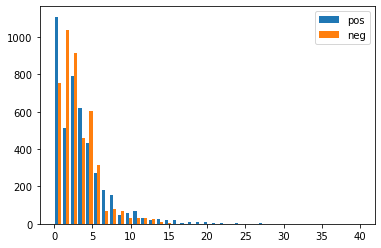

In [44]:
bins = np.linspace(0, 40, 40)
plt.hist([df_extract_sorted['#_of_posWords'], df_extract_sorted['#_of_negWords']], bins, label = ['pos', 'neg'])
plt.legend(loc = 'upper right')
plt.show()

In [45]:
import nltk
nltk.download('vader_lexicon')   # required first time

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/longmini/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
sid = SentimentIntensityAnalyzer()
statements = df_extract_sorted['Related statements in the file']
scores = []
for statement in statements:
    # print(tw)
    score = sid.polarity_scores(statement)
    scores.append(score)
    # print(score)

In [47]:
sent_scores = pd.DataFrame(scores)
sent_scores

,neg,neu,pos,compound
0,0.000,0.949,0.051,0.3612
1,0.060,0.870,0.070,-0.1280
2,0.048,0.762,0.190,0.9406
3,0.103,0.854,0.043,-0.3400
4,0.102,0.682,0.216,0.4588
...,...,...,...,...
4424,0.122,0.765,0.112,-0.1531
4425,0.122,0.765,0.112,-0.1531
4426,0.218,0.638,0.144,-0.3400
4427,0.000,0.769,0.231,0.4019


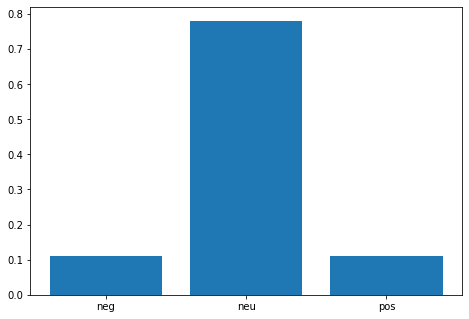

In [48]:
from ipypublish import nb_setup

x = ['neg', 'neu', 'pos']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x, sent_scores[x].mean())
#grid()
plt.show()

## Find default info

In [ ]:
df_pdf_sorted

In [ ]:
def splitlines(text):
    elements = text.split('\n')
    
    lines = []
    for sent in elements:
        sent = sent.replace('\xa0', ' ')
        lines.append(sent)

    while('' in lines):
        lines.remove('')
    while(' ' in lines):
        lines.remove(' ')
    while('  ' in lines):
        lines.remove('  ')
    while('   ' in lines):
        lines.remove('   ')
    
    return lines

In [ ]:
df_pdf_sorted['splitlines'] = df_pdf_sorted['document content'].apply(splitlines)

In [ ]:
df_pdf_sorted

In [ ]:
df_pdf_sorted['splitlines'][10]

In [ ]:
print(df_pdf_sorted['document content'][10])

In [52]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/longmini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
def tokenize(text):
    sent_list = nltk.tokenize.sent_tokenize(text)
    
    return sent_list

In [ ]:
df_pdf_sorted['splitlines'] = df_pdf_sorted['document content'].apply(tokenize)

In [ ]:
df_pdf_sorted

In [ ]:
df_pdf_sorted['splitlines'][10]

In [ ]:
samplelist = df_pdf_sorted['splitlines'][9]
samplelist

In [ ]:
for i in range(len(samplelist)):
    if 'Upon Senior Securities.' in samplelist[i]:
        print(samplelist[i:i+3])
        

In [ ]:
for i in range(len(df_pdf_sorted['splitlines'])):
    for j in range(len(df_pdf_sorted['splitlines'][i])):
        if 'delivery' in df_pdf_sorted['splitlines'][i][j]:
            print(df_pdf_sorted['splitlines'][i][j: j+3])